**Bienvenue dans mon premier projet de Machine Learning : Housing Price Predictor**

**Pour effectuer ceci, il nous faudra donc l'utilisation de plusieurs modèles, opérations de modules importés ci dessous**

In [16]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.linear_model import LinearRegression
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

**On définit et visualise en premier lieu notre dataset sur lequel nous allon travailler tout au long de notre projet**

In [17]:
df = pd.read_csv("./USA_Housing_Dataset.csv")

In [18]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,3.760000e+05,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,8.000000e+05,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2.238888e+06,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,3.240000e+05,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,5.499000e+05,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4136,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4137,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4138,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [39]:
df.shape

(4140, 18)

In [40]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.140000e+03,4140.000000,4140.000000,4140.000000,4.140000e+03,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000
mean,5.530629e+05,3.400483,2.163043,2143.638889,1.469764e+04,1.514130,0.007488,0.246618,3.452415,1831.351449,312.287440,1970.814010,808.368357
std,5.836865e+05,0.903939,0.784733,957.481621,3.587684e+04,0.534941,0.086219,0.790619,0.678533,861.382947,464.349222,29.807941,979.380535
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.200000e+05,3.000000,1.750000,1470.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.600000e+05,3.000000,2.250000,1980.000000,7.676000e+03,1.500000,0.000000,0.000000,3.000000,1600.000000,0.000000,1976.000000,0.000000
75%,6.591250e+05,4.000000,2.500000,2620.000000,1.100000e+04,2.000000,0.000000,0.000000,4.000000,2310.000000,602.500000,1997.000000,1999.000000
max,2.659000e+07,8.000000,6.750000,10040.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,8020.000000,4820.000000,2014.000000,2014.000000


In [41]:
df.iloc[0,:]

date                 2014-05-09 00:00:00
price                           376000.0
bedrooms                             3.0
bathrooms                            2.0
sqft_living                         1340
sqft_lot                            1384
floors                               3.0
waterfront                             0
view                                   0
condition                              3
sqft_above                          1340
sqft_basement                          0
yr_built                            2008
yr_renovated                           0
street           9245-9249 Fremont Ave N
city                             Seattle
statezip                        WA 98103
country                              USA
Name: 0, dtype: object

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4140 non-null   object 
 1   price          4140 non-null   float64
 2   bedrooms       4140 non-null   float64
 3   bathrooms      4140 non-null   float64
 4   sqft_living    4140 non-null   int64  
 5   sqft_lot       4140 non-null   int64  
 6   floors         4140 non-null   float64
 7   waterfront     4140 non-null   int64  
 8   view           4140 non-null   int64  
 9   condition      4140 non-null   int64  
 10  sqft_above     4140 non-null   int64  
 11  sqft_basement  4140 non-null   int64  
 12  yr_built       4140 non-null   int64  
 13  yr_renovated   4140 non-null   int64  
 14  street         4140 non-null   object 
 15  city           4140 non-null   object 
 16  statezip       4140 non-null   object 
 17  country        4140 non-null   object 
dtypes: float

In [43]:
df1 = df.drop(columns=['date', 'street', 'city', 'statezip', 'country'])

In [44]:
df1

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.760000e+05,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0
1,8.000000e+05,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0
2,2.238888e+06,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0
3,3.240000e+05,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0
4,5.499000e+05,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979
4136,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009
4137,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0
4138,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0


In [45]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4140 non-null   float64
 1   bedrooms       4140 non-null   float64
 2   bathrooms      4140 non-null   float64
 3   sqft_living    4140 non-null   int64  
 4   sqft_lot       4140 non-null   int64  
 5   floors         4140 non-null   float64
 6   waterfront     4140 non-null   int64  
 7   view           4140 non-null   int64  
 8   condition      4140 non-null   int64  
 9   sqft_above     4140 non-null   int64  
 10  sqft_basement  4140 non-null   int64  
 11  yr_built       4140 non-null   int64  
 12  yr_renovated   4140 non-null   int64  
dtypes: float64(4), int64(9)
memory usage: 420.6 KB


**Afin d'obtenir une matrice de corrélation, on enlève les infos correspondant à des string ou object dans le but de garder les infos numériques les plus relationnelles avec le prix de la maison**

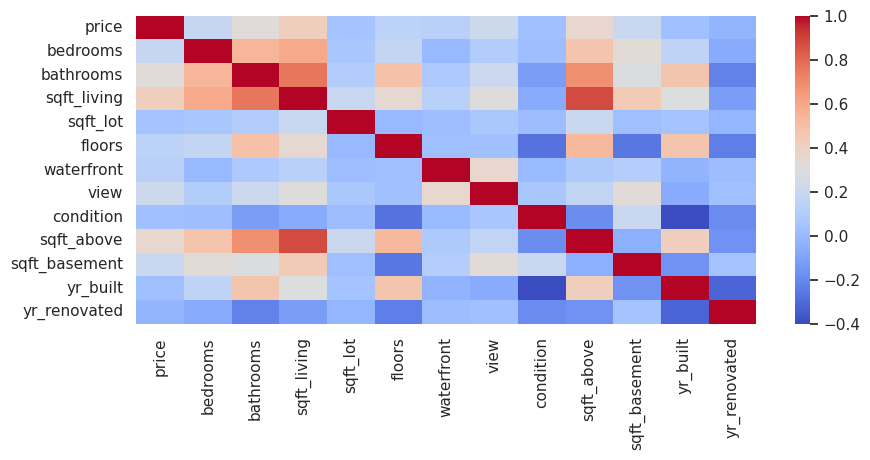

In [47]:
sns.set(rc={'figure.figsize':(10,4)})

df_corr = df1.corr()

ax = sns.heatmap(df_corr, xticklabels = df_corr.columns , 
                 yticklabels = df_corr.columns, cmap = 'coolwarm')



**D'après la matrice de corrélation entre les données numériques correspondant aux variables du dataset, on constate certaines fortes et faibles corrélation entre les données**

Les variables qui semblent le plus en corrélation avec le prix des maisons sont :



In [48]:
features_to_keep = [
    'sqft_living',
    'bathrooms',
    'bedrooms',
    'view',
    'waterfront',
    'sqft_above',
    'sqft_basement',
    'floors' 
]


df_corr = df[features_to_keep].corr()

In [49]:
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, sqft_living to floors
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sqft_living    8 non-null      float64
 1   bathrooms      8 non-null      float64
 2   bedrooms       8 non-null      float64
 3   view           8 non-null      float64
 4   waterfront     8 non-null      float64
 5   sqft_above     8 non-null      float64
 6   sqft_basement  8 non-null      float64
 7   floors         8 non-null      float64
dtypes: float64(8)
memory usage: 876.0+ bytes


In [50]:
df_corr

,sqft_living,bathrooms,bedrooms,view,waterfront,sqft_above,sqft_basement,floors
sqft_living,1.000000,0.760353,0.590110,0.308098,0.126157,0.874881,0.439053,0.345130
bathrooms,0.760353,1.000000,0.542549,0.210590,0.080152,0.687679,0.292170,0.487462
bedrooms,0.590110,0.542549,1.000000,0.105512,-0.001286,0.478124,0.329862,0.178908
view,0.308098,0.210590,0.105512,1.000000,0.359237,0.167270,0.325002,0.030604
waterfront,0.126157,0.080152,-0.001286,0.359237,1.000000,0.081076,0.109736,0.021278
sqft_above,0.874881,0.687679,0.478124,0.167270,0.081076,1.000000,-0.051039,0.524777
sqft_basement,0.439053,0.292170,0.329862,0.325002,0.109736,-0.051039,1.000000,-0.261826
floors,0.345130,0.487462,0.178908,0.030604,0.021278,0.524777,-0.261826,1.000000


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4140 non-null   object 
 1   price          4140 non-null   float64
 2   bedrooms       4140 non-null   float64
 3   bathrooms      4140 non-null   float64
 4   sqft_living    4140 non-null   int64  
 5   sqft_lot       4140 non-null   int64  
 6   floors         4140 non-null   float64
 7   waterfront     4140 non-null   int64  
 8   view           4140 non-null   int64  
 9   condition      4140 non-null   int64  
 10  sqft_above     4140 non-null   int64  
 11  sqft_basement  4140 non-null   int64  
 12  yr_built       4140 non-null   int64  
 13  yr_renovated   4140 non-null   int64  
 14  street         4140 non-null   object 
 15  city           4140 non-null   object 
 16  statezip       4140 non-null   object 
 17  country        4140 non-null   object 
dtypes: float

In [52]:
df['country']

0       USA
1       USA
2       USA
3       USA
4       USA
       ... 
4135    USA
4136    USA
4137    USA
4138    USA
4139    USA
Name: country, Length: 4140, dtype: object

In [53]:
df = df.drop("country", axis='columns')

In [54]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,2014-05-09 00:00:00,3.760000e+05,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103
1,2014-05-09 00:00:00,8.000000e+05,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014
2,2014-05-09 00:00:00,2.238888e+06,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029
3,2014-05-09 00:00:00,3.240000e+05,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117
4,2014-05-10 00:00:00,5.499000e+05,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133
4136,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007
4137,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059
4138,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178


In [55]:
print(df['city'].nunique())

43


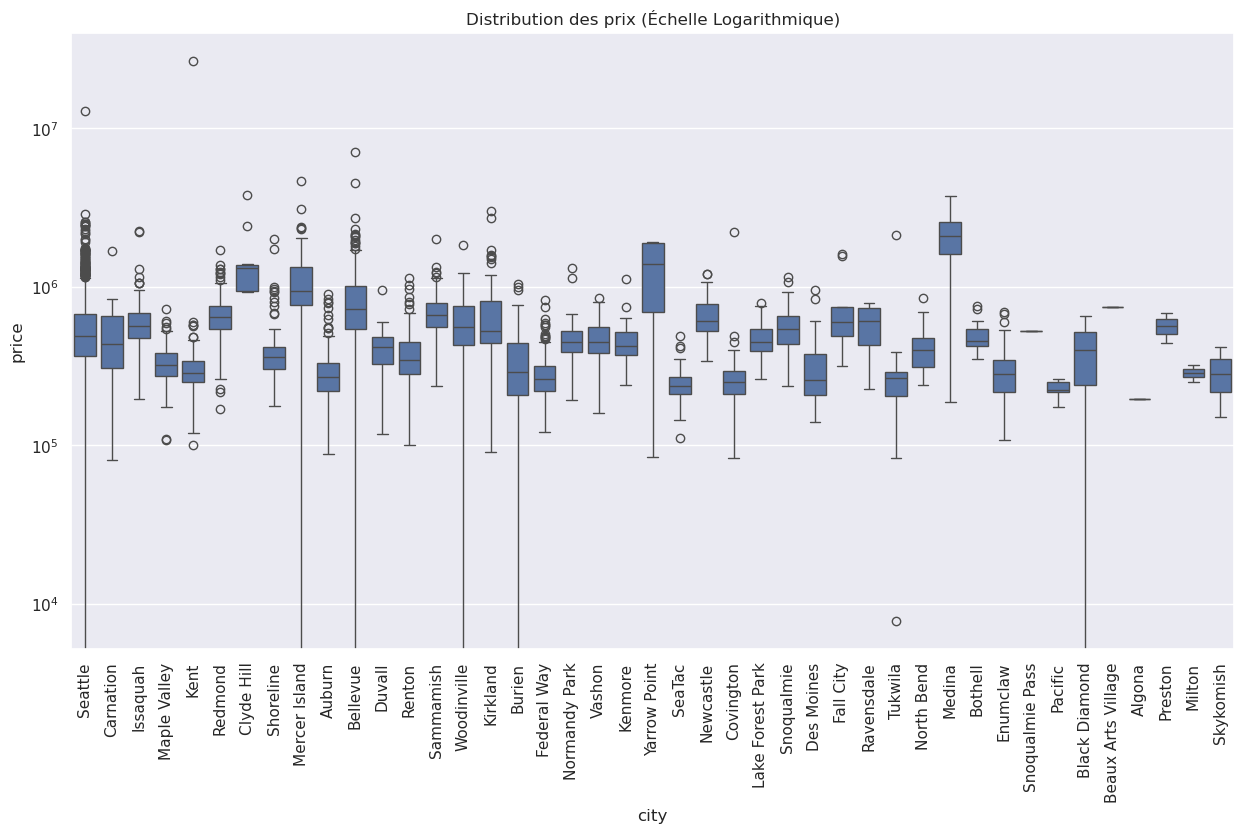

In [60]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='city', y='price', data=df)


plt.yscale('log')

plt.xticks(rotation=90)
plt.title("Distribution des prix (Échelle Logarithmique)")
plt.show()

In [63]:
df = df.drop('date', axis = 'columns')

In [64]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,3.760000e+05,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103
1,8.000000e+05,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014
2,2.238888e+06,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029
3,3.240000e+05,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117
4,5.499000e+05,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133
4136,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007
4137,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059
4138,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178


In [65]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd


target_column = ['city'] 


encoder = OneHotEncoder(sparse_output=False)


one_hot_encoded = encoder.fit_transform(df[target_column])


one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(target_column))


df_encoded = pd.concat([df, one_hot_df], axis=1)

df_encoded = df_encoded.drop(target_column, axis=1)

print(df_encoded.head())

       price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0   376000.0       3.0       2.00         1340      1384     3.0           0   
1   800000.0       4.0       3.25         3540    159430     2.0           0   
2  2238888.0       5.0       6.50         7270    130017     2.0           0   
3   324000.0       3.0       2.25          998       904     2.0           0   
4   549900.0       5.0       2.75         3060      7015     1.0           0   

   view  condition  sqft_above  ...  city_SeaTac  city_Seattle  \
0     0          3        1340  ...          0.0           1.0   
1     0          3        3540  ...          0.0           0.0   
2     0          3        6420  ...          0.0           0.0   
3     0          3         798  ...          0.0           1.0   
4     0          5        1600  ...          0.0           1.0   

   city_Shoreline city_Skykomish city_Snoqualmie  city_Snoqualmie Pass  \
0             0.0            0.0             0.0

In [66]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 58 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    4140 non-null   float64
 1   bedrooms                 4140 non-null   float64
 2   bathrooms                4140 non-null   float64
 3   sqft_living              4140 non-null   int64  
 4   sqft_lot                 4140 non-null   int64  
 5   floors                   4140 non-null   float64
 6   waterfront               4140 non-null   int64  
 7   view                     4140 non-null   int64  
 8   condition                4140 non-null   int64  
 9   sqft_above               4140 non-null   int64  
 10  sqft_basement            4140 non-null   int64  
 11  yr_built                 4140 non-null   int64  
 12  yr_renovated             4140 non-null   int64  
 13  street                   4140 non-null   object 
 14  statezip                

**Procédons à l'éloboration de notre premier modèle tout simple qui s'appliquera à un dataset sans villes ou variables objects**

In [74]:
df_corr = df.drop(['street', 'city', 'statezip'], axis='columns')

In [75]:
df_corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.760000e+05,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0
1,8.000000e+05,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0
2,2.238888e+06,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0
3,3.240000e+05,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0
4,5.499000e+05,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979
4136,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009
4137,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0
4138,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0


In [77]:
df_corr['is_renovated'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

In [78]:
df_corr['house_age'] = 2014 - df['yr_built']

In [80]:
df_corr = df_corr.drop(['yr_built', 'yr_renovated'], axis = 'columns')

In [81]:
df_corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,is_renovated,house_age
0,3.760000e+05,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,0,6
1,8.000000e+05,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,0,7
2,2.238888e+06,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,0,4
3,3.240000e+05,3.0,2.25,998,904,2.0,0,0,3,798,200,0,7
4,5.499000e+05,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,0,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1,60
4136,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1,31
4137,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,0,5
4138,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,0,40


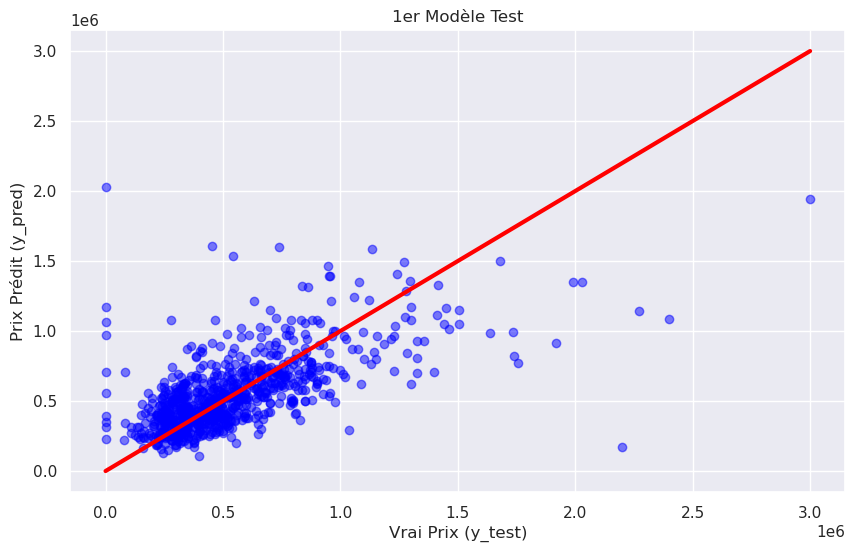

🎯 Score R² (Précision) : 0.37
💰 Erreur moyenne (RMSE) : 256,027 $


In [86]:
#Etape1: Préparation des variables Modèle LinearRegression
X = df_corr.drop('price', axis='columns')
y = df_corr['price']

# --- ÉTAPE 2 : Séparation (Train / Test) ---
# On garde 20% des maisons de côté pour l'examen final (test_size=0.2)
# random_state=42 permet d'avoir toujours le même mélange (pour comparer tes tests)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- ÉTAPE 3 : Entraînement (Le Fit) ---
model = LinearRegression()
model.fit(X_train, y_train) # C'est ici que la magie opère 🧠

# --- ÉTAPE 4 : Évaluation (L'Examen) ---
# On demande au modèle de prédire les prix des 20% qu'il n'a jamais vus
y_pred = model.predict(X_test)

# On compare ses réponses (y_pred) avec la réalité (y_test)
score_r2 = r2_score(y_test, y_pred)
erreur_moyenne = np.sqrt(mean_squared_error(y_test, y_pred))

plt.figure(figsize=(10, 6))


plt.scatter(y_test, y_pred, color='blue', alpha=0.5)


plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=3)

plt.xlabel("Vrai Prix (y_test)")
plt.ylabel("Prix Prédit (y_pred)")
plt.title("1er Modèle Test")
plt.show()
print(f"🎯 Score R² (Précision) : {score_r2:.2f}") 
print(f"💰 Erreur moyenne (RMSE) : {erreur_moyenne:,.0f} $")


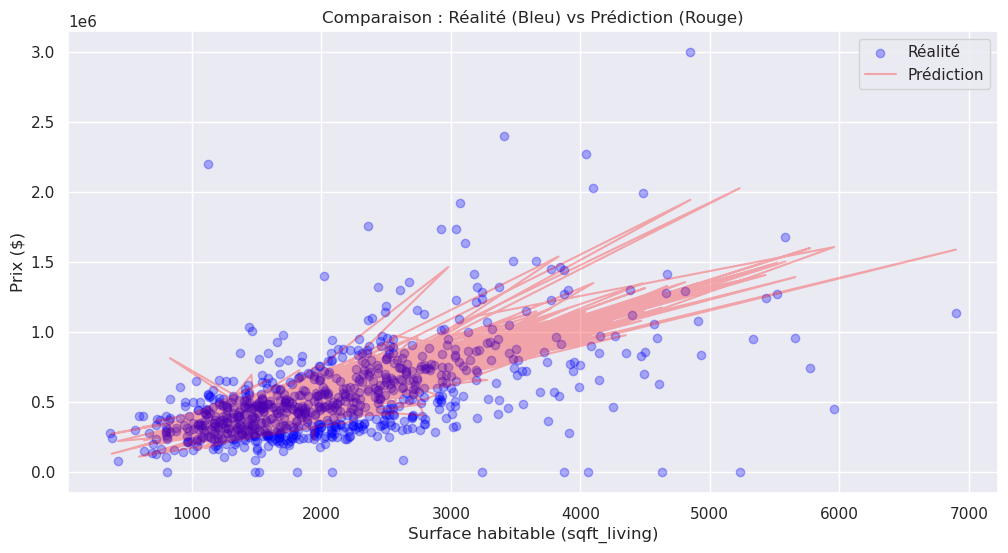

In [88]:

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))


plt.scatter(X_test['sqft_living'], y_test, color='blue', alpha=0.3, label='Réalité')


plt.plot(X_test['sqft_living'], y_pred, color='red', alpha=0.3, label='Prédiction')

plt.xlabel('Surface habitable (sqft_living)')
plt.ylabel('Prix ($)')
plt.title('Comparaison : Réalité (Bleu) vs Prédiction (Rouge)')
plt.legend()
plt.show()

/home/joris/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


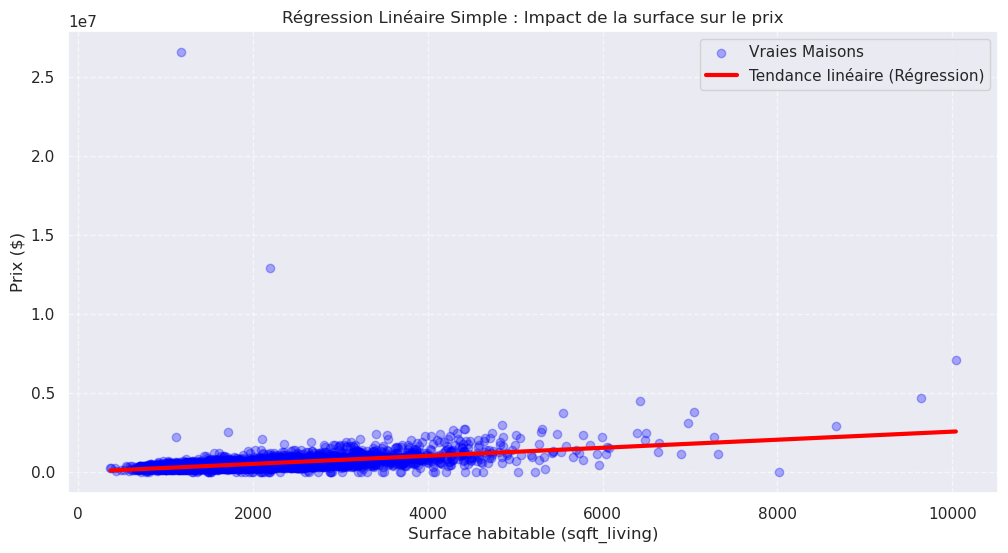

In [89]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# --- ÉTAPE 1 : On isole les données pour notre graphique ---
# On prend TOUTES les données pour bien voir le nuage complet
X_graph = df[['sqft_living']] # Attention aux doubles crochets [[ ]] pour que ça reste un DataFrame
y_graph = df['price']


model_simple = LinearRegression()
model_simple.fit(X_graph, y_graph)


X_ligne_rouge = np.linspace(X_graph.min(), X_graph.max(), 100).reshape(-1, 1)

y_ligne_rouge = model_simple.predict(X_ligne_rouge)

# --- ÉTAPE 4 : LE DESSIN FINAL ---
plt.figure(figsize=(12, 6))

# A. Les vrais points (Le nuage bleu)
plt.scatter(X_graph, y_graph, color='blue', alpha=0.3, label='Vraies Maisons')


plt.plot(X_ligne_rouge, y_ligne_rouge, color='red', linewidth=3, label='Tendance linéaire (Régression)')

plt.xlabel('Surface habitable (sqft_living)')
plt.ylabel('Prix ($)')
plt.title('Régression Linéaire Simple : Impact de la surface sur le prix')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()